In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire as a
import prepare as p
import wrangle as w

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency

## As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
# Wrangle Zillow
zillow = w.wrangle_zillow()

In [3]:
# Index not normalized. Reset index and dropped unnormalized index.
zillow = zillow.reset_index().drop('index',axis=1)

In [4]:
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,2.341702
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,1.208457
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,1.225289
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,1.719219
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,3.687428


## Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
# Splitting Zillow df without stratify
train, val, test = p.split_data_continious(zillow)

In [6]:
# Shape of my stuff
train.shape, val.shape, test.shape

((1192919, 8), (511252, 8), (426043, 8))

In [7]:
# copy of my train data set. Use copy() to get a deep copy, which will not be affected by future variable updates
train_scaled = train.copy()

In [8]:
train.columns

Index(['bedrooms', 'bathrooms', 'sq_ft', 'tax_value', 'year', 'tax_amount',
       'fips', 'tax_rate'],
      dtype='object')

## Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [9]:
def plot_variable_pairs(df):
    
    ''' Function to take in df and do a pair plot using kind=reg'''
    
    sns.pairplot(df.sample(5000), corner=True, kind='reg')
    plt.show()
    
    

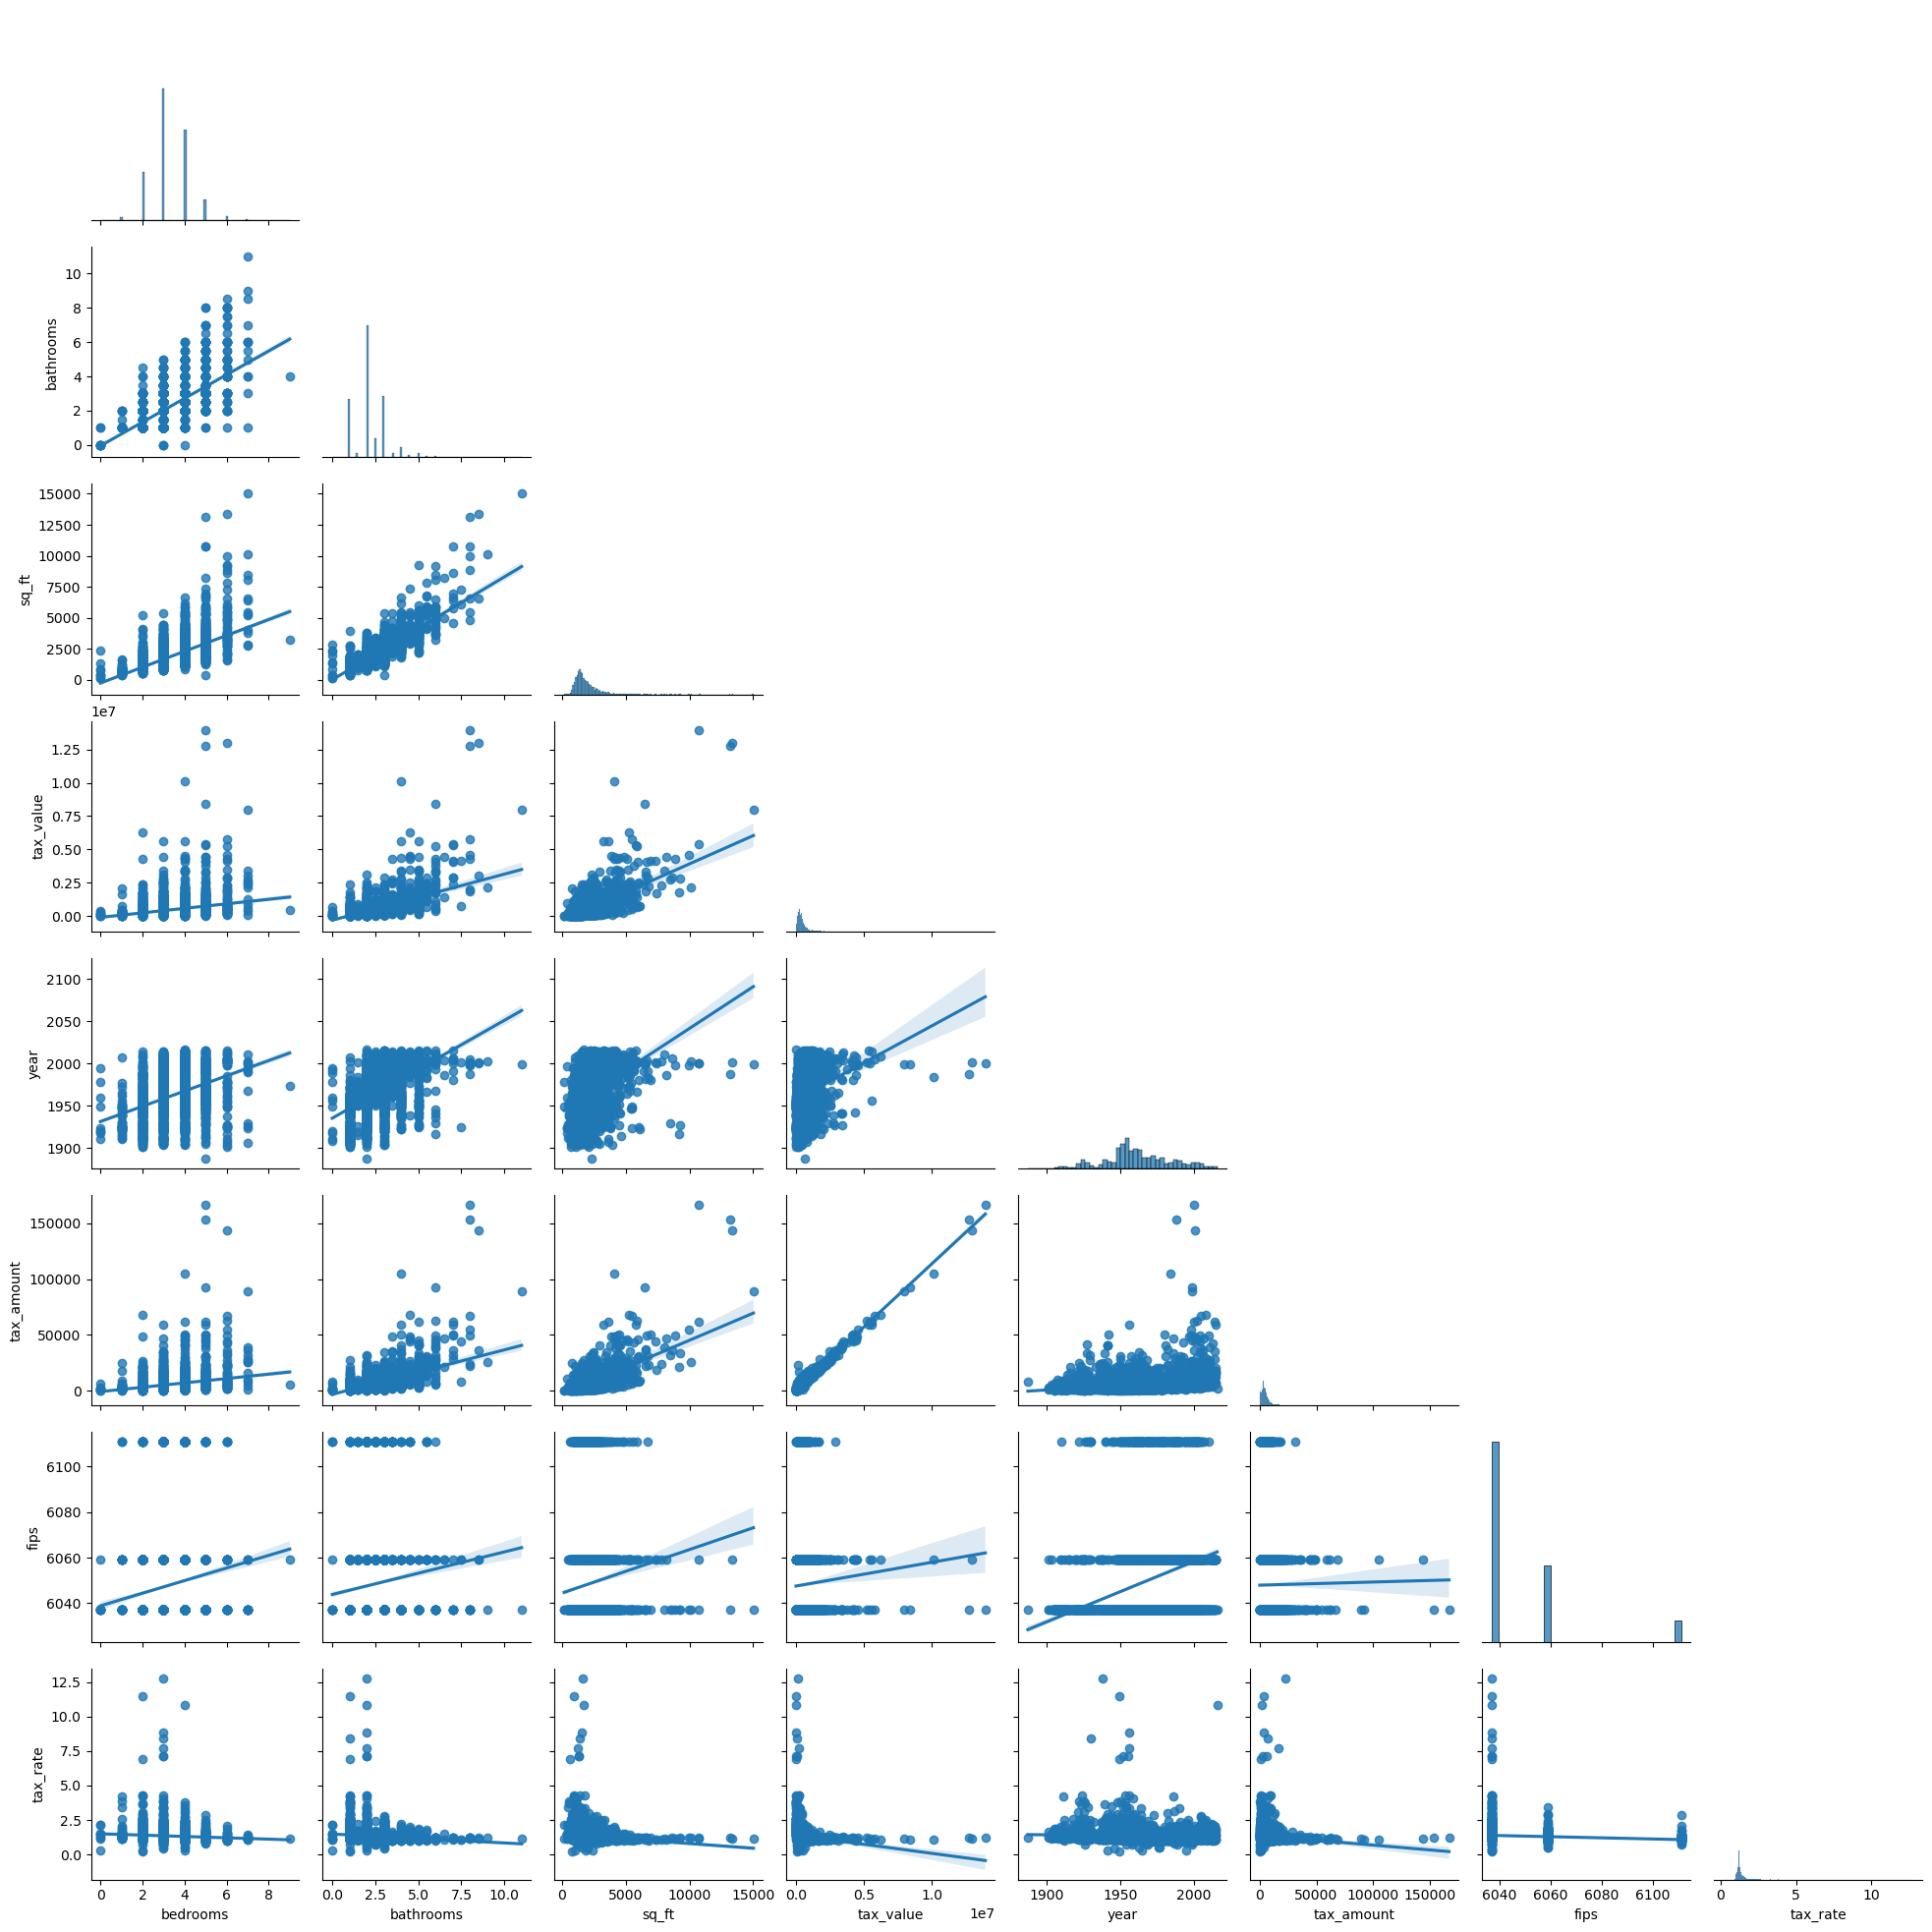

In [10]:
plot_variable_pairs(train)

## Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- sns.swarmplot
- sns.stripplot
- sns.boxplot
- sns.violinplot
- sns.barplot

In [38]:
def plot_categorical_and_continious_vars(df, cat, con):
    
    ''' Takes in df and plots the categorical/discrete and continious features 
        and outputs visuals'''
    
    sns.barplot(x= cat, y=con, data=df.sample(2000))
    plt.show()
    
    sns.swarmplot(x= cat, y=con, data=df.sample(2000))
    plt.show()
    
    sns.boxplot(x= cat, y=con, data=df.sample(2000))
    plt.ylim(0, 1600000)
    plt.show()
    

In [12]:
train.head(2)

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
549010,4.0,2.0,1556.0,373090.0,1923.0,4579.25,6037.0,1.227385
1198359,3.0,2.0,1513.0,74070.0,1937.0,986.55,6037.0,1.331916


## Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Done

## Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [13]:
zillow.head()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,2.341702
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,1.208457
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,1.225289
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,1.719219
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,3.687428


## Come up with some initial hypotheses based on your goal of predicting property value.

1. The property value(tax_value) increases as the size of the house increases.
2. The tax rate decreases as the property value increases.
3. The newer the house, the higher the property value is.
4. The avg tax_value is influenced by fips value.

## Visualize all combinations of variables in some way.

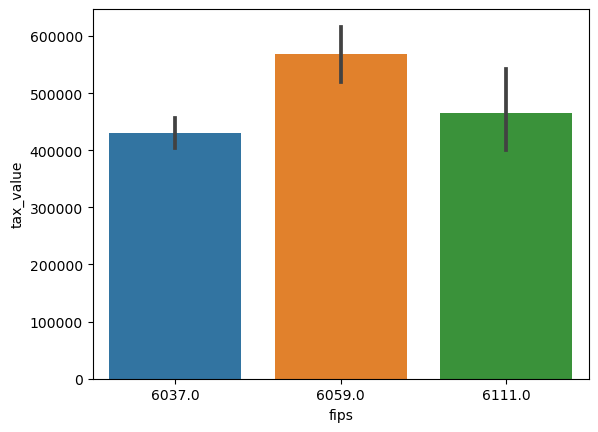

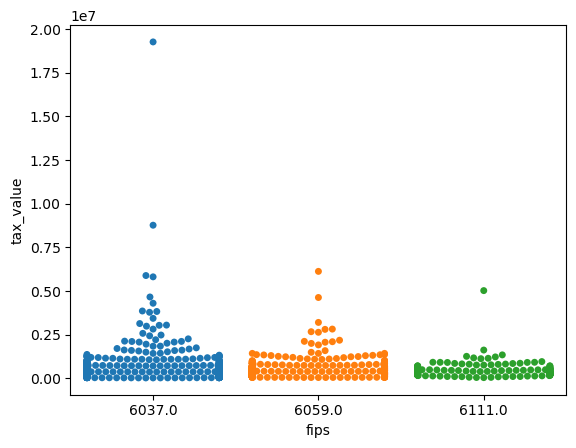

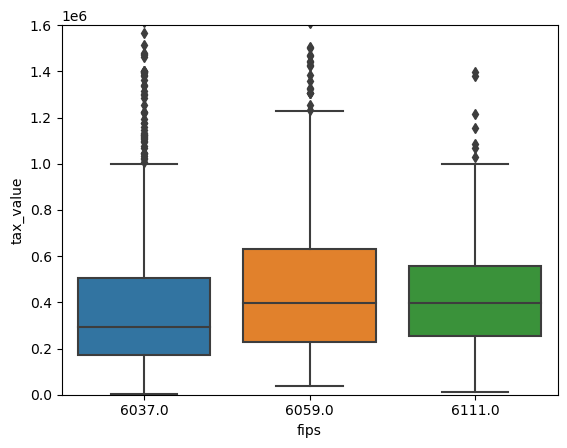

In [39]:
plot_categorical_and_continious_vars(train, 'fips', 'tax_value')

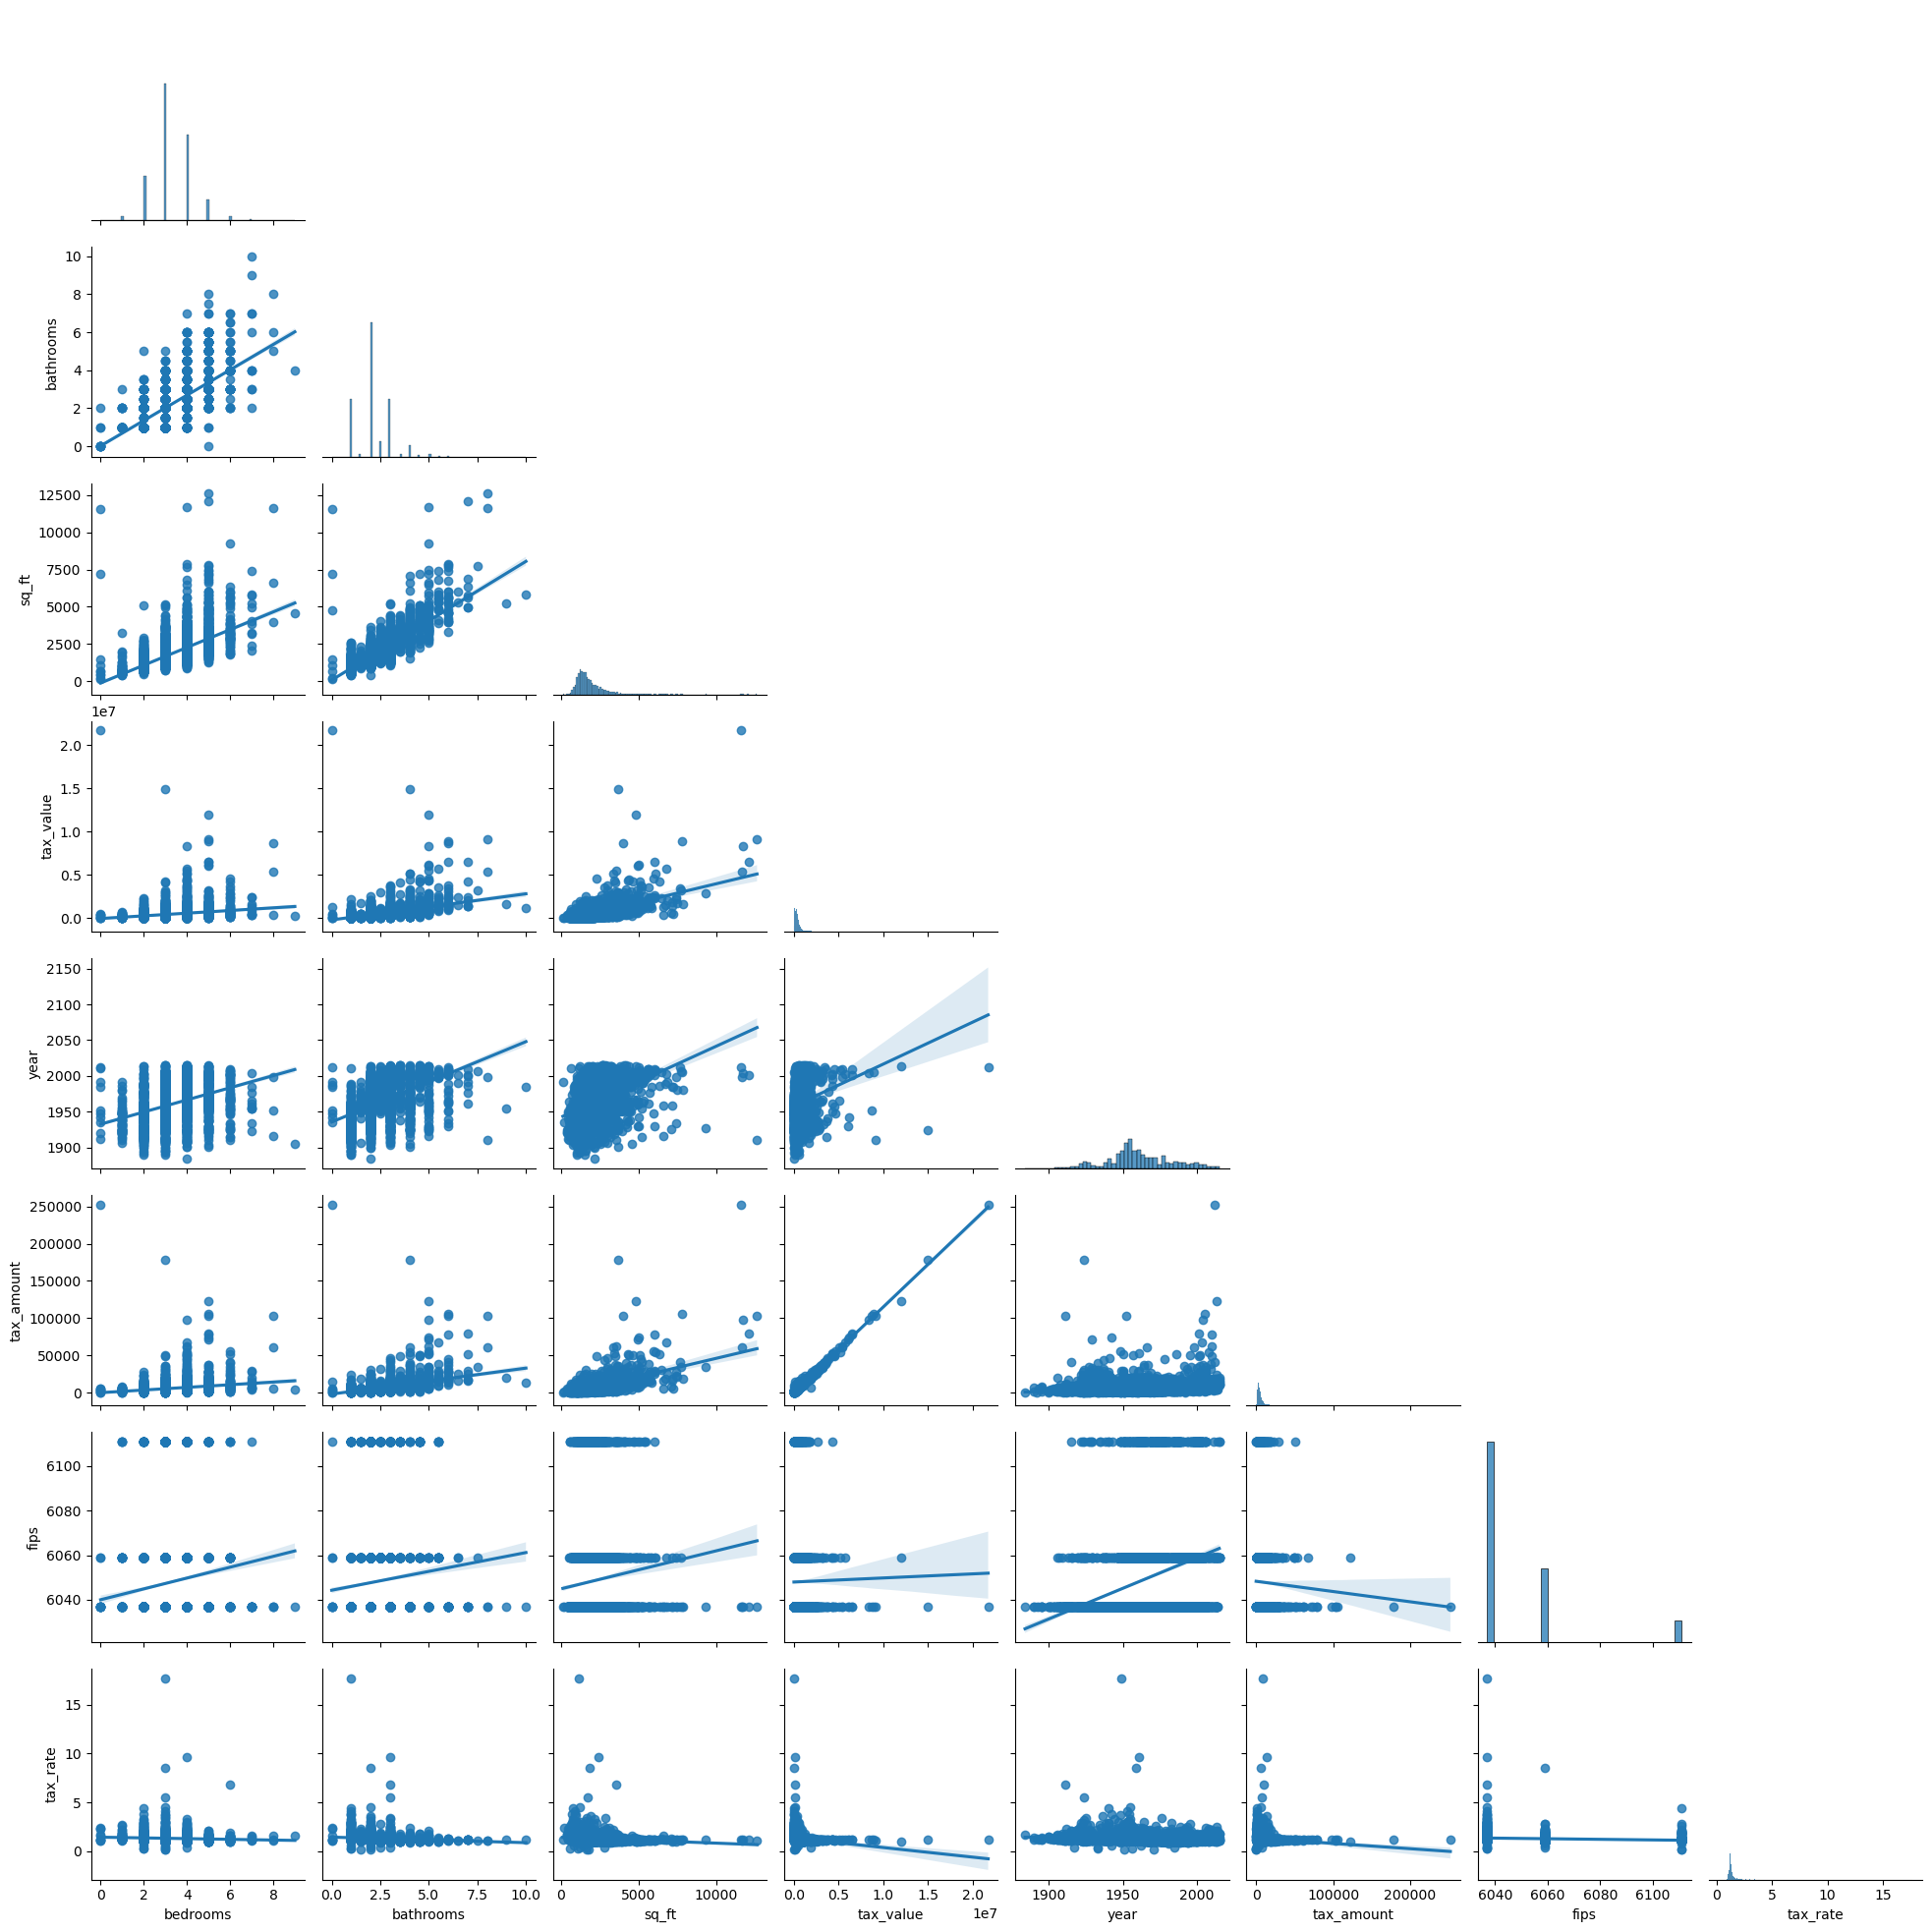

In [29]:
plot_variable_pairs(train)

## Run the appropriate statistical tests where needed.

In [40]:
train.corr()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
bedrooms,1.000000,0.641983,0.539584,0.259286,0.377385,0.260512,0.136412,-0.005776
bathrooms,0.641983,1.000000,0.744199,0.507247,0.509533,0.507785,0.097763,-0.009274
sq_ft,0.539584,0.744199,1.000000,0.548269,0.392739,0.546605,0.086191,-0.008451
tax_value,0.259286,0.507247,0.548269,1.000000,0.193014,0.990425,0.018351,-0.010879
year,0.377385,0.509533,0.392739,0.193014,1.000000,0.194676,0.300607,-0.005256
tax_amount,0.260512,0.507785,0.546605,0.990425,0.194676,1.000000,-0.005263,-0.007167
fips,0.136412,0.097763,0.086191,0.018351,0.300607,-0.005263,1.000000,-0.010562
tax_rate,-0.005776,-0.009274,-0.008451,-0.010879,-0.005256,-0.007167,-0.010562,1.000000


## What independent variables are correlated with the dependent variable, home value?

In [43]:
train.corr().T

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
bedrooms,1.000000,0.641983,0.539584,0.259286,0.377385,0.260512,0.136412,-0.005776
bathrooms,0.641983,1.000000,0.744199,0.507247,0.509533,0.507785,0.097763,-0.009274
sq_ft,0.539584,0.744199,1.000000,0.548269,0.392739,0.546605,0.086191,-0.008451
tax_value,0.259286,0.507247,0.548269,1.000000,0.193014,0.990425,0.018351,-0.010879
year,0.377385,0.509533,0.392739,0.193014,1.000000,0.194676,0.300607,-0.005256
tax_amount,0.260512,0.507785,0.546605,0.990425,0.194676,1.000000,-0.005263,-0.007167
fips,0.136412,0.097763,0.086191,0.018351,0.300607,-0.005263,1.000000,-0.010562
tax_rate,-0.005776,-0.009274,-0.008451,-0.010879,-0.005256,-0.007167,-0.010562,1.000000


bedrooms, bathrooms, sq. ft.

## Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



In [42]:
train.corr()

,bedrooms,bathrooms,sq_ft,tax_value,year,tax_amount,fips,tax_rate
bedrooms,1.000000,0.641983,0.539584,0.259286,0.377385,0.260512,0.136412,-0.005776
bathrooms,0.641983,1.000000,0.744199,0.507247,0.509533,0.507785,0.097763,-0.009274
sq_ft,0.539584,0.744199,1.000000,0.548269,0.392739,0.546605,0.086191,-0.008451
tax_value,0.259286,0.507247,0.548269,1.000000,0.193014,0.990425,0.018351,-0.010879
year,0.377385,0.509533,0.392739,0.193014,1.000000,0.194676,0.300607,-0.005256
tax_amount,0.260512,0.507785,0.546605,0.990425,0.194676,1.000000,-0.005263,-0.007167
fips,0.136412,0.097763,0.086191,0.018351,0.300607,-0.005263,1.000000,-0.010562
tax_rate,-0.005776,-0.009274,-0.008451,-0.010879,-0.005256,-0.007167,-0.010562,1.000000


bedrooms and bathrooms, bedrooms and sq ft, tax amount and sq ft,bathrooms and year

## Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Okay

## Explore your dataset with any other visualizations you think will be helpful.

<AxesSubplot:xlabel='fips', ylabel='tax_amount'>

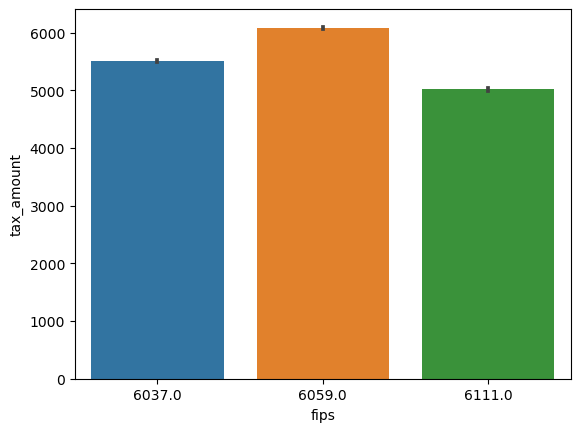

In [44]:
sns.barplot(x='fips', y='tax_amount', data=train)